In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = "Rev/ecom_data.csv"

In [3]:
df = pd.read_csv("ecom_data1.csv", parse_dates=["InvoiceDay"])
df

,SalesOrder,SKU,Description,UnitPrice,CustomerID,Channel,State,InvoiceDay,Sales,Quantity
0,580636,22474,SPACEBOY TV DINNER TRAY,1.95,16746,Mailing,IL,2011-12-05,31.20,16
1,581426,70006,LOVE HEART POCKET WARMER,0.79,17757,Organic Social,WA,2011-12-08,2.37,3
2,575063,22697,GREEN REGENCY TEACUP AND SAUCER,2.95,16764,Display,TX,2011-11-08,8.85,3
3,544065,20726,LUNCH BAG WOODLAND,1.65,14346,Organic Social,TX,2011-02-15,13.20,8
4,568896,85049E,SCANDINAVIAN REDS RIBBONS,1.25,16361,Store,NY,2011-09-29,52.50,42
...,...,...,...,...,...,...,...,...,...,...
406824,573774,85099F,JUMBO BAG STRAWBERRY,1.74,16029,Store,NM,2011-11-01,1485.96,854
406825,573361,23263,SET OF 3 WOODEN HEART DECORATIONS,1.25,14456,Email,OH,2011-10-30,7.50,6
406826,565748,22739,RIBBON REEL CHRISTMAS SOCK BAUBLE,1.65,14156,Email,GA,2011-09-06,33.00,20
406827,577504,21733,RED HANGING HEART T-LIGHT HOLDER,2.95,14159,SEO,NY,2011-11-20,88.50,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   SalesOrder   406829 non-null  object        
 1   SKU          406829 non-null  object        
 2   Description  406829 non-null  object        
 3   UnitPrice    406829 non-null  float64       
 4   CustomerID   406829 non-null  int64         
 5   Channel      406829 non-null  object        
 6   State        406829 non-null  object        
 7   InvoiceDay   406829 non-null  datetime64[ns]
 8   Sales        406829 non-null  float64       
 9   Quantity     406829 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 31.0+ MB


In [5]:
df = df.drop(columns=['SKU', 'Description','State', 'Quantity', 'UnitPrice'])
df

,SalesOrder,CustomerID,Channel,InvoiceDay,Sales
0,580636,16746,Mailing,2011-12-05,31.20
1,581426,17757,Organic Social,2011-12-08,2.37
2,575063,16764,Display,2011-11-08,8.85
3,544065,14346,Organic Social,2011-02-15,13.20
4,568896,16361,Store,2011-09-29,52.50
...,...,...,...,...,...
406824,573774,16029,Store,2011-11-01,1485.96
406825,573361,14456,Email,2011-10-30,7.50
406826,565748,14156,Email,2011-09-06,33.00
406827,577504,14159,SEO,2011-11-20,88.50


In [6]:
df.to_csv(r'R.csv', index = False)

In [7]:
df=df.astype({"CustomerID": "category"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   SalesOrder  406829 non-null  object        
 1   CustomerID  406829 non-null  category      
 2   Channel     406829 non-null  object        
 3   InvoiceDay  406829 non-null  datetime64[ns]
 4   Sales       406829 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


In [8]:
df=df.sort_values(["InvoiceDay"])

In [11]:
df= df[df.Sales > 0.00]

In [12]:
#df.to_csv(r'R.csv', index = False)

In [13]:
df= df.set_index("InvoiceDay")
df

,SalesOrder,CustomerID,Channel,Sales
InvoiceDay,,,,
2010-12-01,536500,17377,SEO,53.55
2010-12-01,536520,14729,Store,6.96
2010-12-01,536542,16456,Organic Social,24.75
2010-12-01,536488,17897,Organic Social,1.65
2010-12-01,536366,17850,Organic Social,9.25
...,...,...,...,...
2011-12-09,581501,12985,Organic Social,17.55
2011-12-09,581578,12713,Store,106.25
2011-12-09,581496,16558,Store,106.25


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor

# Forecast difference of log values
X, Y = df[['log_difference_2', 'log_difference_3']], tsdf['log_difference_1']

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0)

# Initialize the estimator
mdl_adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.05)

# Fit the data
mdl_adaboost.fit(X_train, Y_train)

# Make predictions
pred = mdl_adaboost.predict(X_test)

test_size = X_test.shape[0]

In [14]:
df = df.groupby("CustomerID")
df

In [15]:
#df.Sales.rolling(90).mean()

<AxesSubplot:title={'center':'Forecast'}, xlabel='CustomerID,InvoiceDay'>

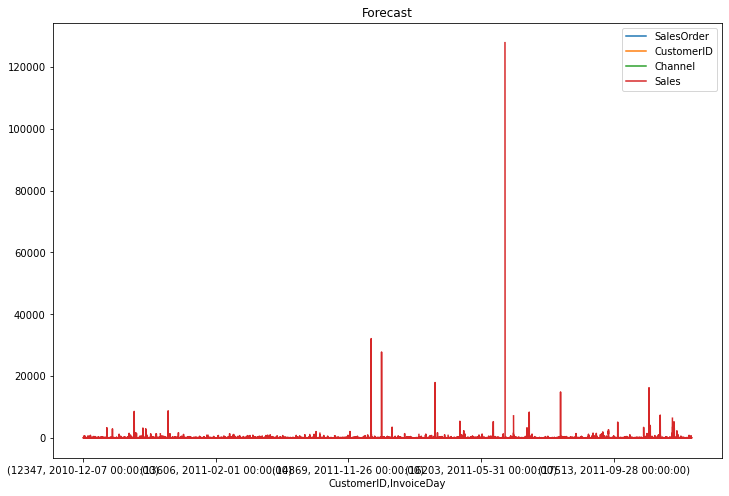

In [16]:
#df.rolling('90', min_periods=1)['Sales'].sum()
df.resample('90D').mean().plot(figsize=(12,8), 
title="Forecast",legend=True)

In [20]:
df.rolling('90D', min_periods=1)['Sales'].sum().plot(figsize=(12,8), 
title="Forecast",legend=True)


IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
#df.to_csv(r'prompt1.csv', index = False)

In [ ]:
dfg = df.groupby(["CustomerID"]).count().add_suffix("_count")
dfg.dropna(inplace=True)

In [ ]:
dfg= dfg.set_index("InvoiceDay")
dfg

In [ ]:
#dfg = dfg.reset_index().sort_values("InvoiceDay")
#dfg

In [ ]:
dfg.resample('90D').mean().plot(figsize=(12,8), 
title="Pre-Forecast",legend=True)

In [ ]:
dfg.rolling('90', min_periods=1)['Sales'].sum().plot(figsize=(12,8), 
title="Pre-Forecast",legend=True)

In [ ]:
cust1 = dfg[dfg["CustomerID"]==12347].sort_values("InvoiceDay")
cust1

In [ ]:
#cust1.to_csv(r'cust1.csv', index = False)

In [ ]:
cust1.plot(x="InvoiceDay", y="Sales_count")

In [ ]:
cust1= cust1.set_index("InvoiceDay")
cust1

In [ ]:
#cust1 = pd.to_datetime(cust1.index)

In [ ]:
#cust1 = pd.DataFrame(cust1, index=['2010-12-01', '2011-12-09'])
#cust1.index = pd.PeriodIndex(cust1.index, freq='D')
#cust1

In [ ]:
#cust1= r.rolling

In [ ]:
#cust1.index = df.resample("1d").sum().fillna(0).rolling(window=90, min_periods=1).mean()
cust1


In [ ]:
#resampled=cust1.resample("90D")
resampled